# FY22 Metrics Project
### Kiana Gonzalez-Rodholm

Note that all data has been sensored and labeled differently than orginial content in order to peserve company privacy. Some elements of the analaysis have been removed completely for this reason.

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

## Platform 1 Analysis

In [2]:
# import data and clean
df = pd.read_excel('data/Copy of FY22 Metrics.xlsx')
df = df.drop(range(35,61))
df = df.fillna(0)
df.head(37)

,Site,LOB,Total number of documents,total number of documents published,total number of updates
0,6.0,A,105,522,23
1,6.0,E,1895,906,12
2,6.0,L,557,55,4
3,6.0,MGT,239,177,17
4,6.0,Site-wide Projects,0,52,0
5,6.0,T,183,98,25
6,6.0,W,61,53,6
7,6.0,C,390,24,5
8,6.0,EO,33,0,0
9,6.0,F,1038,914,26


In [3]:
# rename columns
columns = {'Site':'site','Total number of documents':'total_docs','total number of documents published':'total_docs_published',
           'total number of updates':'total_updates'}
df = df.rename(columns=columns)
df.head()

,site,LOB,total_docs,total_docs_published,total_updates
0,6.0,A,105,522,23
1,6.0,E,1895,906,12
2,6.0,L,557,55,4
3,6.0,MGT,239,177,17
4,6.0,Site-wide Projects,0,52,0


In [4]:
# sum of all features
df.sum()

site                                                                142.0
LOB                     AELMGTSite-wide ProjectsTWCEOFMRASCHHGWMSOACEF...
total_docs                                                          11796
total_docs_published                                                10721
total_updates                                                         543
dtype: object

In [5]:
# sum of docs by LOB
df.groupby(['LOB']).sum()

,site,total_docs,total_docs_published,total_updates
LOB,,,,
A,9.0,1131,2863,219
AS,6.0,265,0,0
C,9.0,519,159,9
CH,5.0,31,0,0
DC,2.0,244,0,0
E,10.0,3125,1319,27
EO,6.0,33,0,0
ER,3.0,76,0,0
F,10.0,2541,3725,158


In [6]:
# sum of docs by site
sum_df = df.groupby(['site']).sum()
sum_df = sum_df.sort_values('total_docs')
sum_df

,total_docs,total_docs_published,total_updates
site,,,
4.0,78,0,0
5.0,208,0,0
2.0,244,0,0
1.0,297,6,0
3.0,4960,6606,393
6.0,6009,4109,150


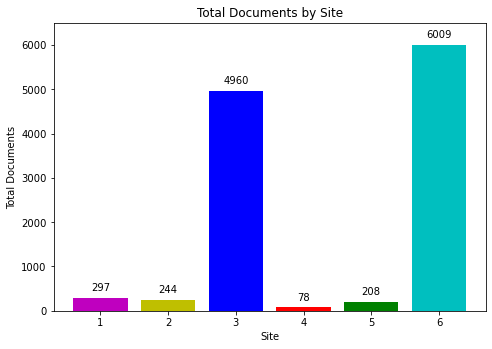

In [7]:
# bar chart of total edocs by site
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(sum_df.index, sum_df.total_docs, color=['r','g','y','m','b','c'])
ax.set_title('Total Documents by Site')
ax.set_ylabel('Total Documents')
ax.set_xlabel('Site')
ax.set_ylim(0, 6500) # adjust y limit to include labels

rects = ax.patches

# For each bar: Place a label
for rect in ax.patches:
    # Get X and Y placement of label from rect.
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2

    # Number of points between bar and label. Change to your liking.
    space = 5
    # Vertical alignment for positive values
    va = 'bottom'

    # Use Y value as label and format number with one decimal place
    label = "{:}".format(y_value)

    # Create annotation
    ax.annotate(
        label,                      # Use `label` as label
        (x_value, y_value),         # Place label at end of the bar
        xytext=(0, space),          # Vertically shift label by `space`
        textcoords="offset points", # Interpret `xytext` as offset in points
        ha='center',                # Horizontally center label
        va=va)                      # Vertically align label differently for
                                        # positive and negative values.

plt.show()

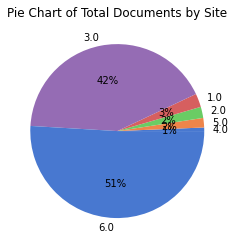

In [8]:
# pie chart of total edocs by site
import seaborn as sns

#define Seaborn color palette to use
colors = sns.color_palette('muted')[0:5]

#create pie chart
plt.pie(sum_df.total_docs, labels=sum_df.index, colors=colors, autopct='%.0f%%')
plt.title('Pie Chart of Total Documents by Site')
plt.show()

In [9]:
sum_df_sorted = sum_df.sort_values('total_docs_published')
sum_df_sorted

,total_docs,total_docs_published,total_updates
site,,,
4.0,78,0,0
5.0,208,0,0
2.0,244,0,0
1.0,297,6,0
6.0,6009,4109,150
3.0,4960,6606,393


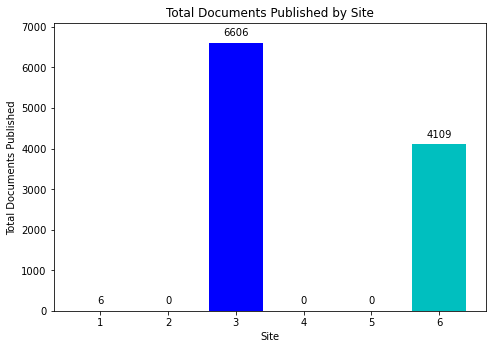

In [10]:
# bar chart of total edocs published by site
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(sum_df_sorted.index, sum_df_sorted.total_docs_published, color= ['c','b'])
ax.set_title('Total Documents Published by Site')
ax.set_ylabel('Total Documents Published')
ax.set_xlabel('Site')
ax.set_ylim(0, 7100) # adjust y limit to include labels
rects = ax.patches

# For each bar: Place a label
for rect in ax.patches:
    # Get X and Y placement of label from rect.
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2

    # Number of points between bar and label. Change to your liking.
    space = 5
    # Vertical alignment for positive values
    va = 'bottom'

    # Use Y value as label and format number with one decimal place
    label = "{:}".format(y_value)

    # Create annotation
    ax.annotate(
        label,                      # Use `label` as label
        (x_value, y_value),         # Place label at end of the bar
        xytext=(0, space),          # Vertically shift label by `space`
        textcoords="offset points", # Interpret `xytext` as offset in points
        ha='center',                # Horizontally center label
        va=va)                      # Vertically align label differently for
                                        # positive and negative values.

plt.show()

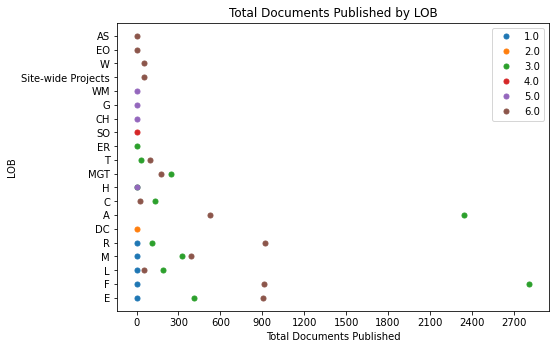

In [11]:
# scatter plot of docs published by LOB and filtered by site
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
groups = df.groupby('site')
xticks = np.arange(0,3000,300)

for name, group in groups:
    plt.plot(group.total_docs_published, group.LOB, marker='o', linestyle='', markersize=5, label=name)
ax.set_title('Total Documents Published by LOB')
ax.set_xlabel('Total Documents Published')
ax.set_ylabel('LOB')
ax.set_xticks(xticks)
plt.legend()
plt.show()

In [12]:
# df where rows with zero published docs are omitted
df_without0 = df[df.total_docs_published != 0]
df_without0.head()

,site,LOB,total_docs,total_docs_published,total_updates
0,6.0,A,105,522,23
1,6.0,E,1895,906,12
2,6.0,L,557,55,4
3,6.0,MGT,239,177,17
4,6.0,Site-wide Projects,0,52,0


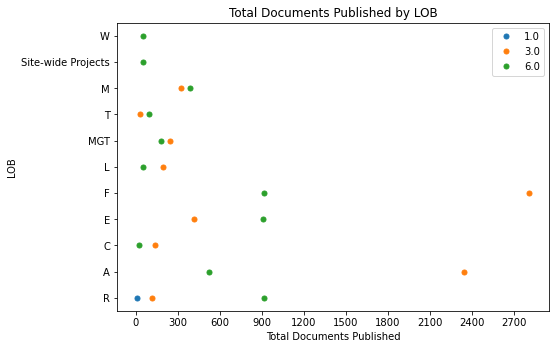

In [13]:
# without zeros!
# scatter plot of docs published by LOB and filtered by site
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
groups = df_without0.groupby('site')
xticks = np.arange(0,3000,300)

for name, group in groups:
    plt.plot(group.total_docs_published, group.LOB, marker='o', linestyle='', markersize=5, label=name)
ax.set_title('Total Documents Published by LOB')
ax.set_xlabel('Total Documents Published')
ax.set_ylabel('LOB')
ax.set_xticks(xticks)
plt.legend()
plt.show()

In [17]:
df_without0['percent'] == (df_without0['total_docs_published']/df_without0['total_docs']) *100
df_without0

,site,LOB,total_docs,total_docs_published,total_updates,percent
0,6.0,A,105,522,23,497.142857
1,6.0,E,1895,906,12,47.810026
2,6.0,L,557,55,4,9.874327
3,6.0,MGT,239,177,17,74.058577
4,6.0,Site-wide Projects,0,52,0,inf
5,6.0,T,183,98,25,53.551913
6,6.0,W,61,53,6,86.885246
7,6.0,C,390,24,5,6.153846
9,6.0,F,1038,914,26,88.053950
10,6.0,M,353,389,3,110.198300


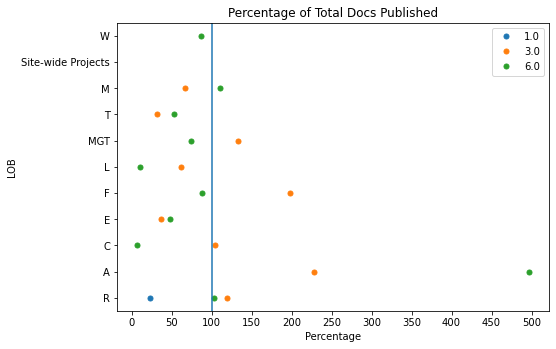

In [18]:
# scatter plot of docs published by LOB and filtered by site
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
groups = df_without0.groupby('site')
xticks = np.arange(0,550,50)

for name, group in groups:
    plt.plot(group.percent, group.LOB, marker='o', linestyle='', markersize=5, label=name)
plt.axvline(x=100)
ax.set_title('Percentage of Total Docs Published')
ax.set_xlabel('Percentage')
ax.set_ylabel('LOB')
ax.set_xticks(xticks)
plt.legend()
plt.show()

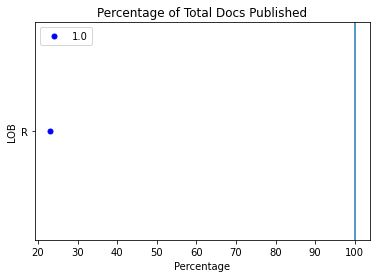

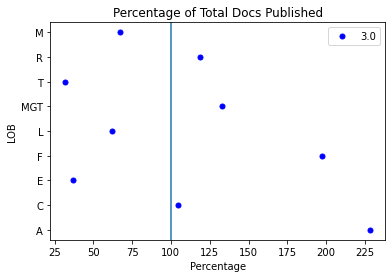

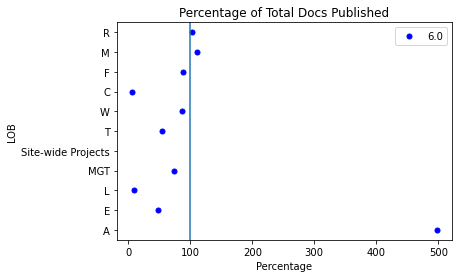

In [19]:
# scatter plot of percentage of docs published by LOB for DLR only
fig = plt.figure()
groups = df_without0.groupby('site')

for name, group in groups:
    plt.plot(group.percent, group.LOB, marker='o', linestyle='', markersize=5, label=name, color='b')
    plt.axvline(x=100)
    plt.title('Percentage of Total Docs Published')
    plt.xlabel('Percentage')
    plt.ylabel('LOB')
    plt.legend()
    plt.show()

## Platform 2 Analysis

In [51]:
# platfrom 2 data
data = {'platform':['chk_man','chk_pub','doc_man_1','doc_man_2','doc_pub_LOB1', 'doc_pub_LOBother','updates_pub'], 
        'totals':[1091,813,24553,639,838,437,947]}
platform2_df = pd.DataFrame(data=data)
platform2_df

,platform,totals
0,chk_man,1091
1,chk_pub,813
2,doc_man_1,24553
3,doc_man_2,639
4,doc_pub_LOB1,838
5,doc_pub_LOBother,437
6,updates_pub,947


C:\Users\krodh\AppData\Local\Temp/ipykernel_23308/2617086679.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels=tick_labels)


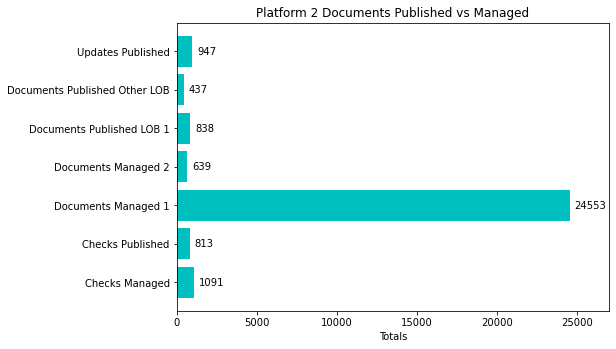

In [54]:
# bar chart of total published by site platform 2
tick_labels = ['Checks Managed', 'Checks Published', 'Documents Managed 1', 'Documents Managed 2',
          'Documents Published LOB 1', 'Documents Published Other LOB', 'Updates Published']

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.barh(platform2_df.platform, trainme_df.totals, color='c')
ax.set_yticklabels(labels=tick_labels)
ax.set_title('Platform 2 Documents Published vs Managed')
ax.set_xlabel('Totals')
ax.set_xlim(0, 27000) # adjust x limit to include labels

rects = ax.patches
# For each bar: Place a label
for rect in rects:
    # Get X and Y placement of label from rect.
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2

    # Number of points between bar and label. Change to your liking.
    space = 5
    # Vertical alignment for positive values
    ha = 'left'

    # Use X value as label and format number with one decimal place
    label = "{:}".format(x_value)

    # Create annotation
    plt.annotate(
        label,                      # Use `label` as label
        (x_value, y_value),         # Place label at end of the bar
        xytext=(space, 0),          # Horizontally shift label by `space`
        textcoords="offset points", # Interpret `xytext` as offset in points
        va='center',                # Vertically center label
        ha=ha)                      # Horizontally align label differently for
                                    # positive and negative values.

plt.show()

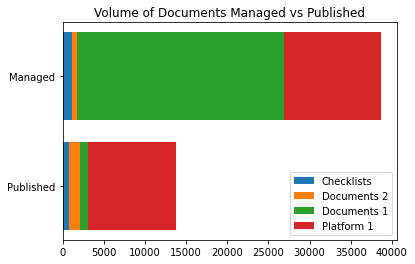

In [34]:
# stacked horizontal bar chart of all docs managed vs published
labels = ['Published','Managed']
chk = np.array([813,1091])
doc2 = np.array([1275,639])
doc1 = np.array([947,25192])
platform1 = np.array([10721,11796])
width = 0.5       # the width of the bars

b1 = plt.barh(labels, chk)
b2 = plt.barh(labels, doc2, left=chk)
b3 = plt.barh(labels, doc1, left=chk+doc2)
b4 = plt.barh(labels, platform1, left=chk+doc2+doc1)

plt.legend([b1, b2, b3, b4], ['Checklists', 'Documents 2','Documents 1', 'Platform 1'], loc="lower right")
plt.title("Volume of Documents Managed vs Published")
plt.show()

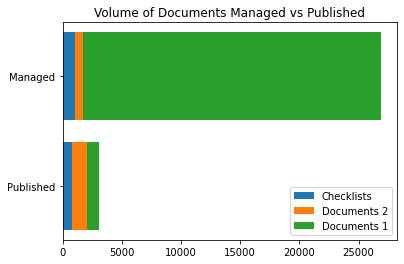

In [35]:
# stacked horizontal bar chart of all docs managed vs published
# minus platform 1
labels = ['Published','Managed']
chk = np.array([813,1091])
doc2 = np.array([1275,639])
doc1 = np.array([947,25192])
width = 0.5       # the width of the bars

b1 = plt.barh(labels, chk)
b2 = plt.barh(labels, doc2, left=chk)
b3 = plt.barh(labels, doc1, left=chk+doc2)

plt.legend([b1, b2, b3], ['Checklists', 'Documents 2','Documents 1'], loc="lower right")
plt.title("Volume of Documents Managed vs Published")
plt.show()

In [36]:
# add totals
# only run once!!
platform2_df.loc[len(platform2_df.index)] = ['total_docs1', 25192]
platform2_df.loc[len(platform2_df.index)] = ['total_docs2', 1275]
platform2_df

,platform,totals
0,chk_man,1091
1,chk_pub,813
2,doc_man_1,24553
3,doc_man_2,639
4,doc_pub_LOB1,838
5,doc_pub_LOBother,437
6,updates_pub,947
7,total_docs1,25192
8,total_docs2,1275


In [37]:
# remove rows not needed
dropped_df = platform2_df.drop(labels=[2,3,4,5], axis=0)
dropped_df

,platform,totals
0,chk_man,1091
1,chk_pub,813
6,updates_pub,947
7,total_docs1,25192
8,total_docs2,1275


C:\Users\krodh\AppData\Local\Temp/ipykernel_23308/2024937747.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels=tick_labels)


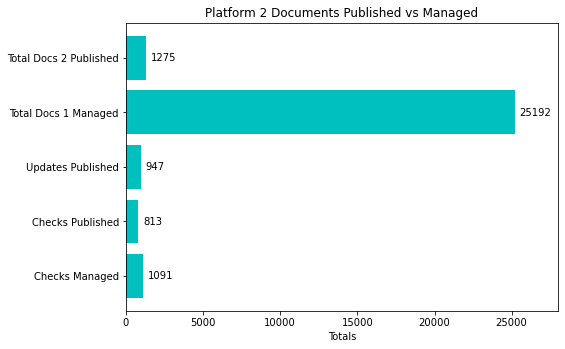

In [42]:
# bar chart of totals managed versus published
tick_labels = ['Checks Managed', 'Checks Published', 'Updates Published','Total Docs 1 Managed',
          'Total Docs 2 Published']

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.barh(dropped_df.platform, dropped_df.totals, color='c')
ax.set_yticklabels(labels=tick_labels)
ax.set_title('Platform 2 Documents Published vs Managed')
ax.set_xlabel('Totals')
ax.set_xlim(0, 28000) # adjust x limit to include labels

rects = ax.patches
# For each bar: Place a label
for rect in rects:
    # Get X and Y placement of label from rect.
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2

    # Number of points between bar and label. Change to your liking.
    space = 5
    # Vertical alignment for positive values
    ha = 'left'

    # Use X value as label and format number with one decimal place
    label = "{:}".format(x_value)

    # Create annotation
    plt.annotate(
        label,                      # Use `label` as label
        (x_value, y_value),         # Place label at end of the bar
        xytext=(space, 0),          # Horizontally shift label by `space`
        textcoords="offset points", # Interpret `xytext` as offset in points
        va='center',                # Vertically center label
        ha=ha)                      # Horizontally align label differently for
                                    # positive and negative values.

plt.show()

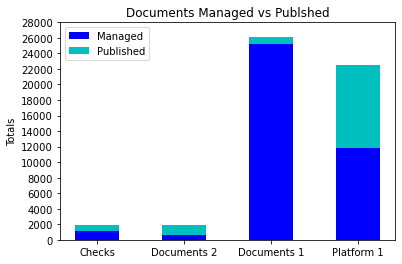

In [43]:
labels = ['Checks','Documents 2','Documents 1','Platform 1']
published = [813,1275,947,10721]
managed = [1091,639,25192,11796]
width = 0.5       # the width of the bars
yticks = np.arange(0,30000,2000)

fig, ax = plt.subplots()

ax.bar(labels, managed, width, label='Managed', color='b')
ax.bar(labels, published, width, bottom=managed, label='Published',color='c')
ax.set_yticks(yticks)
ax.set_ylabel('Totals')
ax.set_title('Documents Managed vs Publshed')
ax.legend(loc='upper left')


plt.show()

## Multimedia Analysis

In [45]:
# multimedia data
mdata = {'resource':['images','videos','audio','simulations'],'totals':[5955,235,1,727]}
multimedia_df = pd.DataFrame(data=mdata)
multimedia_df = multimedia_df.sort_values('totals')
multimedia_df

,resource,totals
2,audio,1
1,videos,235
3,simulations,727
0,images,5955


C:\Users\krodh\AppData\Local\Temp/ipykernel_23308/1631933393.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels=tick_labels)


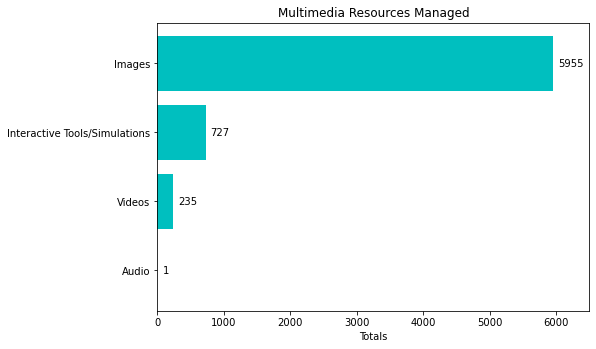

In [46]:
# bar chart of total multimedia work
tick_labels = ['Audio','Videos','Interactive Tools/Simulations', 'Images']

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.barh(multimedia_df.resource, multimedia_df.totals, color='c')
ax.set_yticklabels(labels=tick_labels)
ax.set_title('Multimedia Resources Managed')
ax.set_xlabel('Totals')
ax.set_xlim(0, 6500)

rects = ax.patches
# For each bar: Place a label
for rect in rects:
    # Get X and Y placement of label from rect.
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2

    # Number of points between bar and label. Change to your liking.
    space = 5
    # Vertical alignment for positive values
    ha = 'left'

    # Use X value as label and format number with one decimal place
    label = "{:}".format(x_value)

    # Create annotation
    plt.annotate(
        label,                      # Use `label` as label
        (x_value, y_value),         # Place label at end of the bar
        xytext=(space, 0),          # Horizontally shift label by `space`
        textcoords="offset points", # Interpret `xytext` as offset in points
        va='center',                # Vertically center label
        ha=ha)                      # Horizontally align label differently for
                                    # positive and negative values.

plt.show()